In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Set

df = pd.read_csv("https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/Iris%20(2).csv")
df = df[['SepalLengthCm', 'PetalWidthCm', 'Species']]

In [3]:
# Class Labels

df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
# Check for Missing Data

df.isnull().sum()

SepalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Basic Statistical information

df.describe()

,SepalLengthCm,PetalWidthCm
count,150.000000,150.000000
mean,5.843333,1.198667
std,0.828066,0.763161
min,4.300000,0.100000
25%,5.100000,0.300000
50%,5.800000,1.300000
75%,6.400000,1.800000
max,7.900000,2.500000


In [6]:
# Let as add our validation_data from a specific source

validation_data = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/CPE%20Electives%20(1%20-%203)/04.%20Live%20Lectures%20Notebook/54.%20Support%20Vector%20Machines/validation_data.csv')
validation_data = validation_data[['SepalLengthCm', 'PetalWidthCm', 'Species']]

In [7]:
# Insert New Data to Original DataFrame

df = pd.concat([df, validation_data], axis = 0)
df.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2], inplace = True) # Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

In [8]:
df

,SepalLengthCm,PetalWidthCm,Species
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
3,4.6,0.2,0
4,5.0,0.2,0
...,...,...,...
7,6.0,1.2,-1
8,6.8,2.2,-1
9,6.7,2.4,-1
10,6.7,2.4,-1


In [9]:
# Check if the validation data is properly inserted

df.tail(12)

,SepalLengthCm,PetalWidthCm,Species
0,5.2,0.20,-1
1,5.2,0.20,-1
2,4.7,0.21,-1
3,4.8,0.20,-1
4,5.2,1.30,-1
5,5.0,1.10,-1
6,5.9,1.50,-1
7,6.0,1.20,-1
8,6.8,2.20,-1
9,6.7,2.40,-1


In [10]:
# Data Scaling

X = df.drop('Species', axis = 1)

scaler = StandardScaler()
scaler.fit(X) # This line fit the scaler to the data

StandardScaler()

In [11]:
# Scale the data

scaled_features_data = scaler.transform(X)
scaled_features_data

array([[-8.93525096e-01, -1.30568216e+00],
       [-1.13721376e+00, -1.30568216e+00],
       [-1.38090242e+00, -1.30568216e+00],
       [-1.50274675e+00, -1.30568216e+00],
       [-1.01536943e+00, -1.30568216e+00],
       [-5.27992102e-01, -1.04504448e+00],
       [-1.50274675e+00, -1.17536332e+00],
       [-1.01536943e+00, -1.30568216e+00],
       [-1.74643541e+00, -1.30568216e+00],
       [-1.13721376e+00, -1.43600100e+00],
       [-5.27992102e-01, -1.30568216e+00],
       [-1.25905809e+00, -1.30568216e+00],
       [-1.25905809e+00, -1.43600100e+00],
       [-1.86827975e+00, -1.43600100e+00],
       [-4.06147771e-02, -1.30568216e+00],
       [-1.62459108e-01, -1.04504448e+00],
       [-5.27992102e-01, -1.04504448e+00],
       [-8.93525096e-01, -1.17536332e+00],
       [-1.62459108e-01, -1.17536332e+00],
       [-8.93525096e-01, -1.17536332e+00],
       [-5.27992102e-01, -1.30568216e+00],
       [-8.93525096e-01, -1.04504448e+00],
       [-1.50274675e+00, -1.30568216e+00],
       [-8.

In [12]:
# Convert scaled_features_data (numpy array to DataFrame)

scaled_features_data = pd.DataFrame(scaled_features_data, columns = df.columns[:-1]) # all columns except 'Species'
scaled_features_data.tail()

#df.columns

,SepalLengthCm,PetalWidthCm
157,0.203074,-0.002494
158,1.177829,1.300695
159,1.055984,1.561332
160,1.055984,1.561332
161,0.568607,1.040057


In [13]:
# Set X (features) and y (Class Target)

X = scaled_features_data.iloc[:150,:] # Check the original data
y = df.iloc[:150, -1] # y will be 0 to 149 index of Species

In [14]:
# Show X

X

,SepalLengthCm,PetalWidthCm
0,-0.893525,-1.305682
1,-1.137214,-1.305682
2,-1.380902,-1.305682
3,-1.502747,-1.305682
4,-1.015369,-1.305682
...,...,...
145,1.055984,1.431013
146,0.568607,0.909738
147,0.812296,1.040057
148,0.446763,1.431013


In [15]:
# Show y

y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [16]:
# Train - Test Split Proper

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [17]:
# Show X_train

X_train

,SepalLengthCm,PetalWidthCm
13,-1.868280,-1.436001
102,1.543362,1.170376
67,-0.040615,-0.263131
34,-1.137214,-1.436001
98,-0.893525,-0.132813
...,...,...
63,0.324918,0.258144
70,0.081230,0.779419
81,-0.406148,-0.263131
11,-1.259058,-1.305682


In [18]:
# Show y_train

y_train

13     0
102    2
67     1
34     0
98     1
      ..
63     1
70     1
81     1
11     0
95     1
Name: Species, Length: 105, dtype: int64

In [19]:
# Support Vector Machine Classifier

model = SVC(kernel = 'linear', C = 1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [20]:
# Prediction on X_test

predictions = model.predict(X_test)
predictions

array([0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1])

<Axes: >

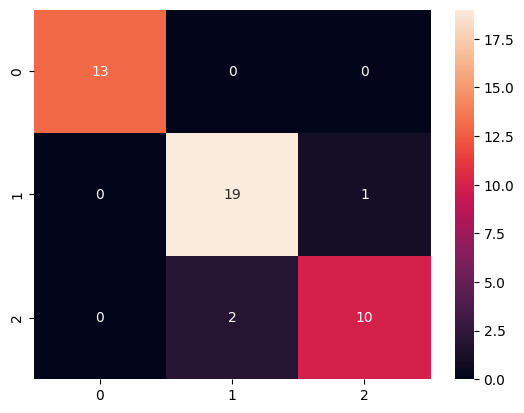

In [21]:
# Confusion Matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd')

In [22]:
# Accuracy Score

print(accuracy_score(y_test, predictions))

0.9333333333333333


In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.95      0.93        20
           2       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [24]:
# Grid Search

from sklearn.model_selection import GridSearchCV

svm = SVC()
param_grid = {'C': [0.01, 0.05, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svm, param_grid)
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [25]:
# Identify the Best Hyperparameters

grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [26]:
# Sample Prediction on Unseen Data

validation_feature = scaled_features_data.iloc[150:,:]
y_predict = model.predict(validation_feature)

prediction_df = pd.concat([validation_feature, pd.DataFrame(y_predict, index = list(range(150,162)), columns = ['Species'])], axis = 1)
prediction_df

,SepalLengthCm,PetalWidthCm,Species
150,-0.771681,-1.305682,0
151,-0.771681,-1.305682,0
152,-1.380902,-1.292650,0
153,-1.259058,-1.305682,0
154,-0.771681,0.127825,1
155,-1.015369,-0.132813,1
156,0.081230,0.388463,1
157,0.203074,-0.002494,1
158,1.177829,1.300695,2
159,1.055984,1.561332,2


In [27]:
# DataFrame to Array

X = X.values
y = y.values

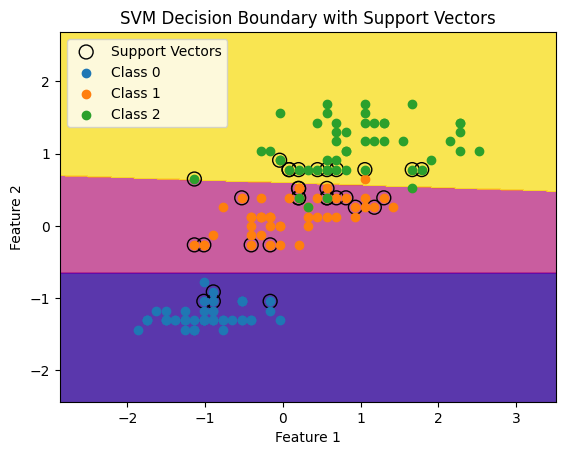

In [28]:
# Plot

# Get support vectors

support_vectors = model.support_vectors_
coef = model.coef_
intercept = model.intercept_

# Create a meshgrid to plot the decision boundary

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class labels for each point in the meshgrid

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap= 'plasma', alpha=0.8)

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

# Plot the data points with different colors for each classs
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], marker='o', label=f'Class {i}', cmap = 'plasma')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Support Vectors')

plt.legend()
plt.show()